In [3]:
import pandas as pd

In [5]:
dataset=pd.read_csv("insurance_pre.csv")

In [7]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [9]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [11]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [13]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [15]:
Independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [17]:
Dependent=dataset[['charges']]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Independent,Dependent,test_size=0.30,random_state=0)

In [21]:
X_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,False,False
196,39,32.800,0,False,False
438,52,46.750,5,False,False
183,44,26.410,0,False,False
1298,33,27.455,2,True,False
...,...,...,...,...,...
763,27,26.030,0,True,False
835,42,35.970,2,True,False
1216,40,25.080,0,True,False
559,19,35.530,0,True,False


In [23]:
Y_train

,charges
1163,2200.83085
196,5649.71500
438,12592.53450
183,7419.47790
1298,5261.46945
...,...
763,3070.80870
835,7160.33030
1216,5415.66120
559,1646.42970


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
X_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [125]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='random',max_features='log2')
regressor=regressor.fit(X_train,Y_train)

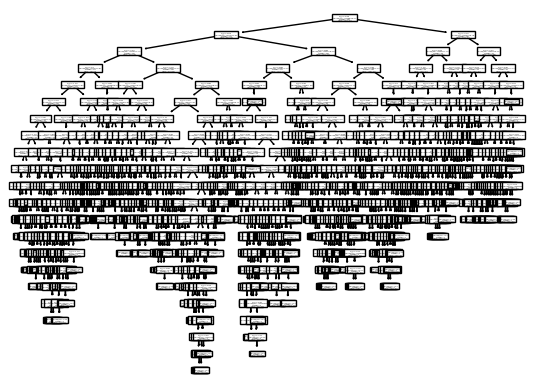

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [127]:
y_pred=regressor.predict(X_test)

In [129]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)

In [131]:
r_score

0.6779948084406744